In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [4]:
with open('auto_nounion.json', 'r') as file:
    auto_no_union = json.load(file)
with open('auto_union.json', 'r') as file:
    auto_union = json.load(file)
with open('auto_union_withAddedAxioms.json', 'r') as file:
    auto_union_withAddedAxioms = json.load(file)

In [5]:
auto_no_union_proof = []
for i in auto_no_union:
    if auto_no_union[i][0] == "ProverResult.PROOF_FOUND":
        time = auto_no_union[i][2]
        auto_no_union_proof.append((i, time))
auto_union_proof = []
for i in auto_union:
    if auto_union[i][0] == "ProverResult.PROOF_FOUND":
        time = auto_union[i][2]
        auto_union_proof.append((i, time))
auto_union_withAddedAxioms_proof = []
for i in auto_union_withAddedAxioms:
    if auto_union_withAddedAxioms[i][0] == "ProverResult.PROOF_FOUND":
        time = auto_union_withAddedAxioms[i][2]
        auto_union_withAddedAxioms_proof.append((i, time))

In auto_no_union_proof but not in others

In [6]:
def find_diff_entries(list1, list2):
    """
    Find entries in list1 that have paths not present in list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths not found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find unique paths in list1 that are not in list2
    unique_paths_list1 = paths_list1 - paths_list2

    # Build the list of unique entries based on the unique paths
    unique_entries = [entry for entry in list1 if entry[0] in unique_paths_list1]

    return unique_entries

In [7]:
value_dict_raw = {
"autoNoUnion_without_autoUnion" : find_diff_entries(auto_no_union_proof, auto_union_proof),
"autoNoUnion_without_autoUnionAdded" : find_diff_entries(auto_no_union_proof, auto_union_withAddedAxioms_proof),
"autoUnion_without_autoNoUnion" : find_diff_entries(auto_union_proof, auto_no_union_proof),
"autoUnion_without_autoUnionAdded" : find_diff_entries(auto_union_proof, auto_union_withAddedAxioms_proof),
"autoUnionAdded_without_autoNoUnion" : find_diff_entries(auto_union_withAddedAxioms_proof, auto_no_union_proof),
"autoUnionAdded_without_autoUnion" : find_diff_entries(auto_union_withAddedAxioms_proof, auto_union_proof)
}

In [8]:
differents_dict = {}
for i in value_dict_raw:
    differents_dict[i] = len(value_dict_raw[i])

In [9]:
def plot_differences(differents_dict: dict, title: str, output_path: str):
    # Convert the dictionary to lists for plotting
    categories = list(differents_dict.keys())
    values = list(differents_dict.values())

    # Plot the data
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(categories, values, color='skyblue', width=0.6)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    
    # If you desire a legend line (you mentioned not needing it in a previous request),
    # comment it out if not needed:
    ax.legend()

    # Set the rotation for x-axis labels to improve readability
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)

    # Introduce horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Add text annotations (counts) above the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.01 * yval,  # small offset above the bar
            f'{yval}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Save plot as a PDF with tight layout
    plt.tight_layout()
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    save_path = path_prefix + output_path
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Example usage
# plot_differences(differents_dict, "Proofs found only in the first named", 50, 'Threshold', 'proofs_unique_analysis.pdf')

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_15149/3372822630.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_15149/3372822630.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)


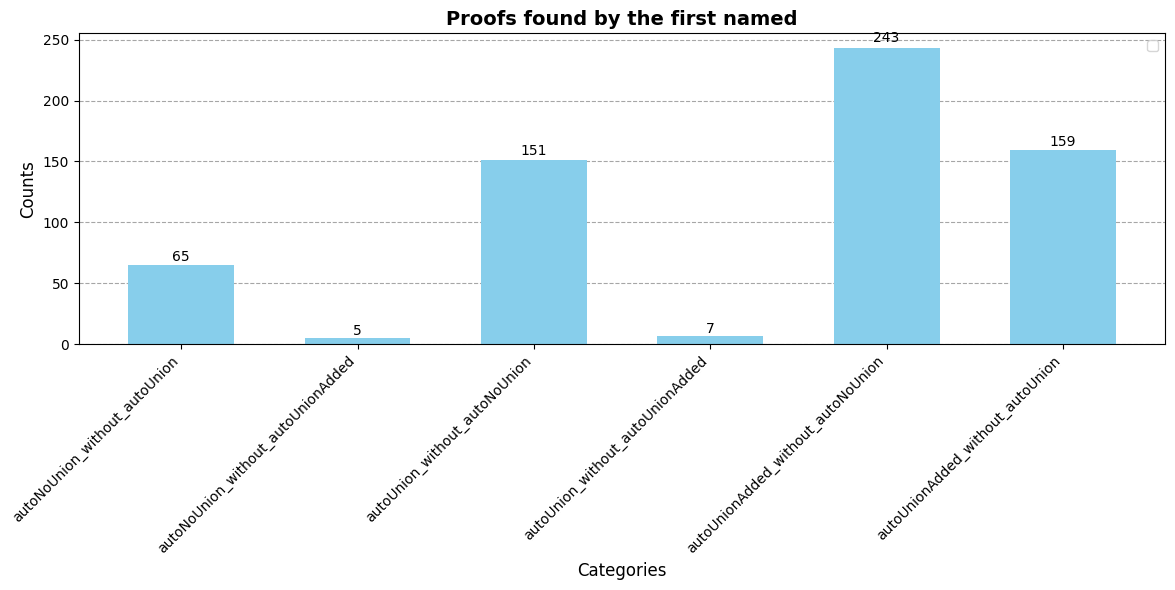

In [10]:
plot_differences(differents_dict=differents_dict, title="Proofs found by the first named", output_path="proof_found_difference.pdf")

In [11]:
time_dict = {
    "time_autoNoUnion" : [entry[1] for entry in auto_no_union_proof],
    "time_autoUnion" : [entry[1] for entry in auto_union_proof],
    "time_autoUnionAddedAxioms" : [entry[1] for entry in auto_union_withAddedAxioms_proof]
}

In [12]:
def plot_average_times(time_dict: dict, title: str, output_path: str):
    # Extract categories and compute averages
    categories = list(time_dict.keys())
    averages = [sum(entry) / len(entry) for entry in time_dict.values()]

    # Plot the data
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(categories, averages, color='skyblue', width=0.6)
    ax.set_ylabel('Average Time', fontsize=12)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the rotation for x-axis labels to improve readability
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)

    # Introduce horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Add text annotations (average values) above the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.01 * yval,  # small offset above the bar
            f'{yval:.2f}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Save plot as a PDF with tight layout
    plt.tight_layout()
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    save_path = path_prefix + output_path
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Example usage
# plot_average_times(time_dict, "Average Times to Find a Proof", "average_times_analysis.pdf")

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_15149/3429355856.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)


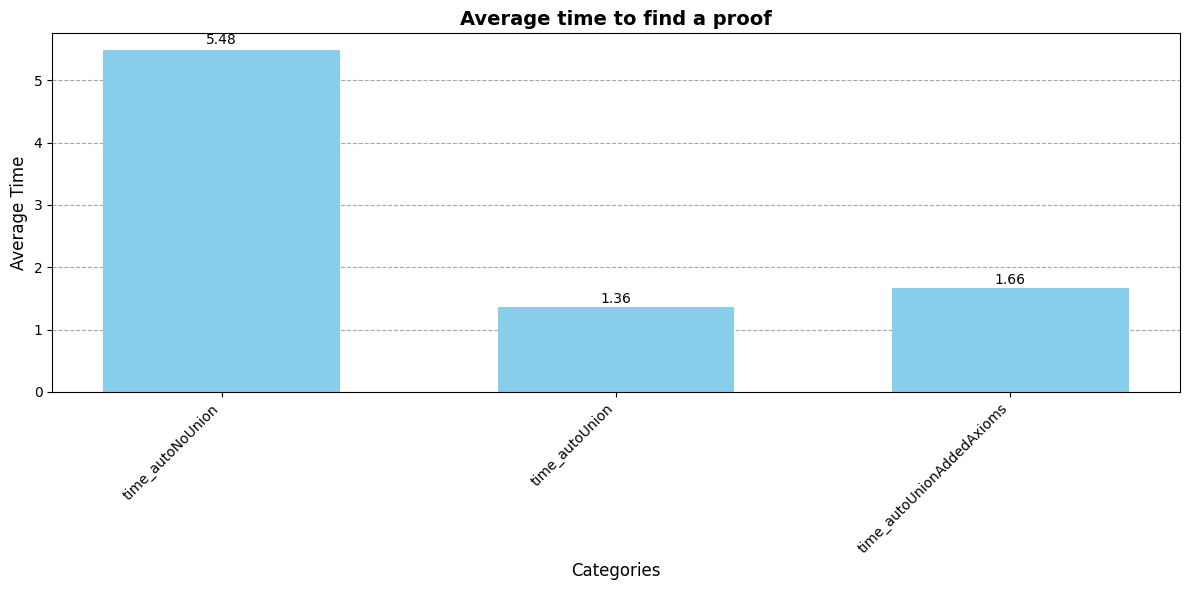

In [13]:
plot_average_times(time_dict=time_dict, title="Average time to find a proof", output_path="time_to_find_proof.pdf")

In [14]:
def find_common_entries(list1, list2):
    """
    Find entries that have paths present in both list1 and list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths also found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find common paths between list1 and list2
    common_paths = paths_list1 & paths_list2

    # Build the list of common entries based on the common paths
    common_entries = [entry for entry in list1 if entry[0] in common_paths]

    return common_entries

In [15]:
common_proof_found_dict_stage = {
    "autoNoUnion_with_autoUnion" : find_common_entries(auto_no_union_proof, auto_union_proof),
    "autoNoUnion_with_autoUnionWithAddedAxioms" : find_common_entries(auto_no_union_proof, auto_union_withAddedAxioms_proof),
    "autoUnion_autoNoUnion" : find_common_entries(auto_union_proof, auto_no_union_proof),
    "autoUnion_autoUnionWithAddedAxioms" : find_common_entries(auto_union_proof, auto_union_withAddedAxioms_proof),
    "autoUnionWithAddedAxioms_with_autoNoUnion" : find_common_entries(auto_union_withAddedAxioms_proof, auto_no_union_proof),
    "autoUnionWithAddedAxioms_with_autoUnion" : find_common_entries(auto_union_withAddedAxioms_proof, auto_union_proof)
}

In [16]:
common_proof_found_dict = {}
for entry in common_proof_found_dict_stage:
    common_proof_found_dict[entry] = [time[1] for time in common_proof_found_dict_stage[entry]]

In [17]:
def plot_common_proof_times(common_proof_found_dict: dict, title: str, output_path: str):
    # Extract categories and compute average times
    categories = list(common_proof_found_dict.keys())
    average_times = [sum(entry) / len(entry) for entry in common_proof_found_dict.values()]

    # Plot the data
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(categories, average_times, color='skyblue', width=0.6)
    ax.set_ylabel('Average Time', fontsize=12)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the rotation for x-axis labels to improve readability
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)

    # Introduce horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Add text annotations (average time values) above the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.01 * yval,  # small offset above the bar
            f'{yval:.2f}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    # Save plot as a PDF with tight layout
    plt.tight_layout()
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    save_path = path_prefix + output_path
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Example usage
# plot_common_proof_times(common_proof_found_dict, "Average Times for Common Proofs by the First Named", "common_proof_times_analysis.pdf")

/var/folders/k1/jwtm00211m596cq2_gjvyz200000gn/T/ipykernel_15149/2358611031.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)


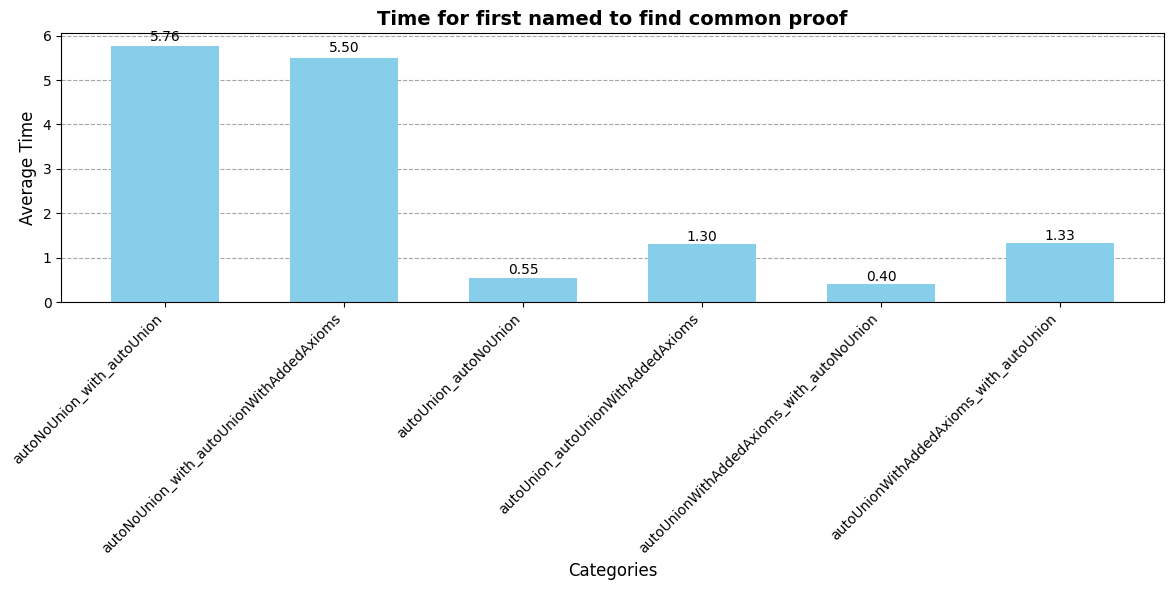

In [18]:
plot_common_proof_times(common_proof_found_dict, "Time for first named to find common proof", "time_to_find_common_proof.pdf")